# Clustering for gevtev

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import cluster
from sklearn.decomposition.pca import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from definitions import *
from utils import *

In [2]:
#path_to_gamma_bins shoud contain an absolute path to your gamma-bins directory
path_to_gamma_bins = os.path.dirname(os.getcwd()) + "/"

In [3]:
#name columns included in the final display
other_names = ['gev_1FGL_Name', 'gev_CLASS1', 'tev_fermi_names', 'tev_classes', 's_MAIN_ID', 's_class','s_simbad', 'marked']
#from gamma bins directory
path_to_catalog = "markeddata/gevtev_simbadclasses_normalized.txt"

In [4]:
spectra = pd.read_csv(path_to_gamma_bins + path_to_catalog, sep='\t')
print(path_to_gamma_bins +path_to_catalog)
spectra.head()

/home/masha/PycharmProjects/gamma-bins/markeddata/gevtev_simbadclasses_normalized.txt


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,...,s_MAIN_ID,s_class,s_simbad,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,tev_glon,tev_glat,marked
0,0.055155,0.201477,0.000004,0.235066,0.028249,0.0,0.391619,0.072840,0.013193,0.002028,...,[],[],0,b' ',b'bll ',b'',b'hbl',74.632011,-78.086937,0
1,0.069119,0.073172,0.003407,0.038325,0.145616,0.0,0.134072,0.020429,0.006452,0.059379,...,[],[],0,b' ',b'snr ',b'',b'snr',120.092361,1.412930,0
2,0.358190,0.178179,0.096737,0.268908,0.097987,0.0,0.000000,0.000000,0.000000,0.000000,...,[],[],0,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',94.174644,-81.216103,0
3,0.269005,0.157462,0.139724,0.220561,0.213247,0.0,0.000000,0.000000,0.000000,0.000000,...,[],[],0,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',120.975426,-2.978120,0
4,0.427725,0.147237,0.104148,0.231066,0.089825,0.0,0.000000,0.000000,0.000000,0.000000,...,[],[],0,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',132.416458,-22.939846,0


In [5]:
spectra = spectra[~(((np.abs(spectra['tev_glat']) < 1.0) & (np.abs(spectra['tev_glon']) < 1.0)) | ((np.abs(spectra['tev_glat']) < 1.0) & np.abs(spectra['tev_glat']) > 359.0)) ]

In [6]:
spectra = spectra.copy()
spectra = spectra.reset_index(drop=True)

In [7]:
spectrum_columns = list_gev_spectrum_columns() + list_tev_spectrum_columns()

In [8]:
def get_distance_metric(metric_function):
    if type(metric_function) == str:
        dist = DistanceMetric.get_metric(metric_function)
    else:
        dist = DistanceMetric.get_metric("pyfunc", func=metric_function)
    return dist

In [9]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
          #'tab:blanchedalmond', 'tab:blueviolet', 'tab:coral', 'tab:greenyellow']

* ### earth mover's distance

In [10]:
# earth mover's distance
metric_function = st.wasserstein_distance
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function, n_jobs=6)
# spectra_distances = get_distance_metric(metric_function).pairwise(spectra[spectrum_columns])
#pd.DataFrame(spectra_distances).to_csv(path_to_gamma_bins +"markeddata/gevtev_spectra_EM_distances.txt", index=False)

In [11]:
from utils import *

Clustering


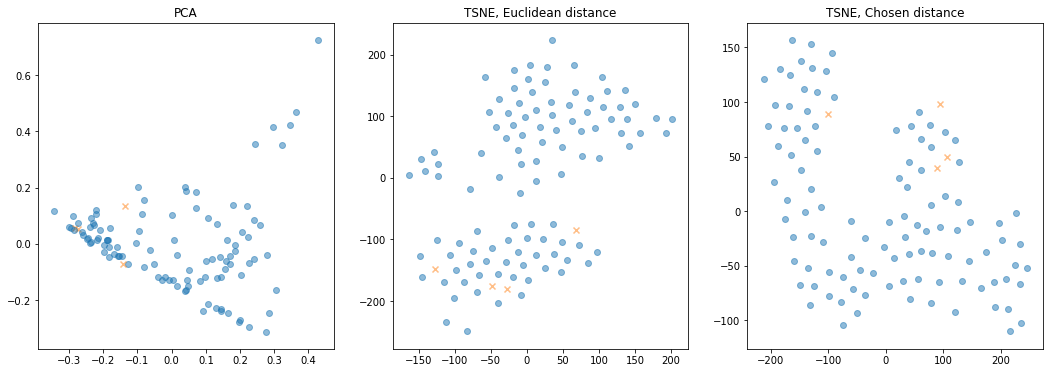

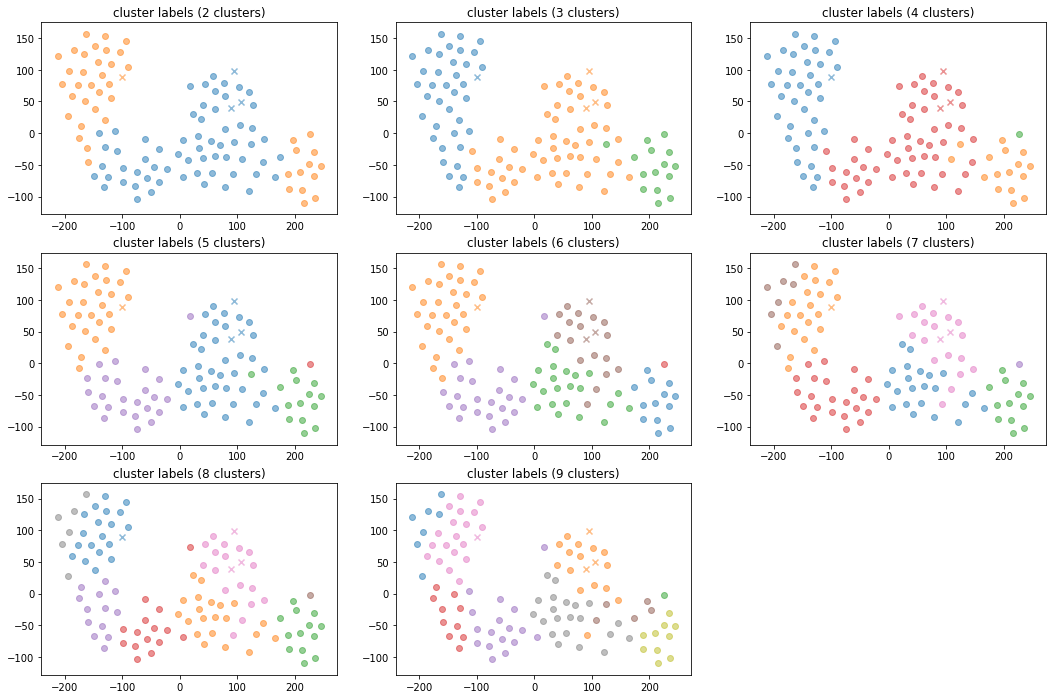

In [12]:
spectra_2D = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)

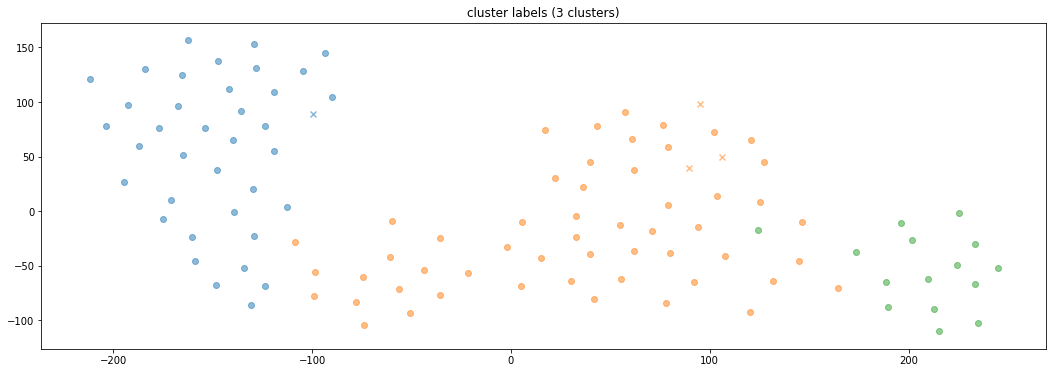

,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,...,s_class,s_simbad,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,tev_glon,tev_glat,marked,KMeans_clusters_3
11,0.014499,0.216198,0.331077,0.099187,0.322293,0.0,0.010681,0.002273,0.002087,0.000712,...,['B0Ve'],1,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',135.675278,1.086135,1,1
40,0.006512,0.225784,0.309710,0.088960,0.355733,0.0,0.003307,0.002040,0.001594,0.002120,...,['B0Ve'],2,b'1FGL J1018.6-5856 ',b'HMB ',b'1FGL J1018.6-5856',b'bin',284.314087,-1.779517,1,1
88,0.007598,0.117064,0.309349,0.034505,0.203540,0.0,0.118844,0.094852,0.067791,0.035185,...,['B0Ve'],1,b'1FGL J1826.2-1450 ',b'HMB ',b'',b'bin',16.881586,-1.289216,1,0
101,0.022409,0.362261,0.111730,0.253947,0.249653,0.0,0.000000,0.000000,0.000000,0.000000,...,['B0Ve'],1,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',80.299477,1.111117,1,1


0 cluster (tab:blue)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
5,b' ',b'bll ',b'',b'hbl',[],[],0,0
8,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',[],[],0,0
9,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'unid',[],[],0,0
12,b'1FGL J0303.5-2406 ',b'BLL ',b'',b'hbl',[],[],0,0
20,b'1FGL J0521.7+2114 ',b'bll ',b'',b'ibl',[],[],0,0
24,b' ',b'PWN ',b'',b'pwn',[],[],0,0
30,b'1FGL J0710.6+5911 ',b'bll ',b'1FGL J0710.6+5911',b'hbl',[],[],0,0
31,b'1FGL J0721.9+7120 ',b'BLL ',b'',b'ibl',[],[],0,0
32,b'1FGL J0809.5+5219 ',b'bll ',b'',b'hbl',[],[],0,0
33,b' ',b'PWN ',b'',b'pwn',[],[],0,0


1 cluster (tab:orange)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
0,b' ',b'bll ',b'',b'hbl',[],[],0,0
2,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',[],[],0,0
3,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',[],[],0,0
4,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',[],[],0,0
6,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',[],[],0,0
7,b'1FGL J0221.0+3555 ',b'FSRQ ',b'',b'blazar',[],[],0,0
11,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',"[""b'LS I +61 303'"" ""b'LS I +61 303'""]",['B0Ve'],1,1
14,b'1FGL J0319.7+4130 ',b'RDG ',b'',b'fri',[],[],0,0
15,b'1FGL J0319.7+1847 ',b'bll ',b'',b'hbl',[],[],0,0
17,b'1FGL J0416.8+0107 ',b'bll ',b'',b'hbl',[],[],0,0


2 cluster (tab:green)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1,b' ',b'snr ',b'',b'snr',[],[],0,0
10,b' ',b'bll ',b'',b'hbl',[],[],0,0
13,b' ',b'rdg ',b'',b'hbl',[],[],0,0
16,b' ',b'bll ',b'',b'hbl',[],[],0,0
19,b'1FGL J0507.9+6738 ',b'bll ',b'',b'hbl',[],[],0,0
21,b' ',b' ',b'',"b'snr,mc'",[],[],0,0
38,b'1FGL J1015.1+4927 ',b'bll ',b'',b'hbl',[],[],0,0
42,b'1FGL J1103.7-2329 ',b'bll ',b'',b'hbl',[],[],0,0
49,b'1FGL J1221.5+2814 ',b'bll ',b'',b'ibl',[],[],0,0
56,b'1FGL J1325.6-4300 ',b'RDG ',b'',b'fri',[],[],0,0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.167489,0.133525,0.120245,0.145664,0.116697,0.0,0.128042,0.070342,0.049739,0.036626,0.031631
1,0.121137,0.213125,0.212004,0.165823,0.225541,0.0,0.042522,0.010006,0.004833,0.003375,0.001634
2,0.126384,0.086228,0.129572,0.080773,0.091722,0.0,0.132027,0.031388,0.026023,0.053847,0.242037


In [13]:
list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 3, colors,spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

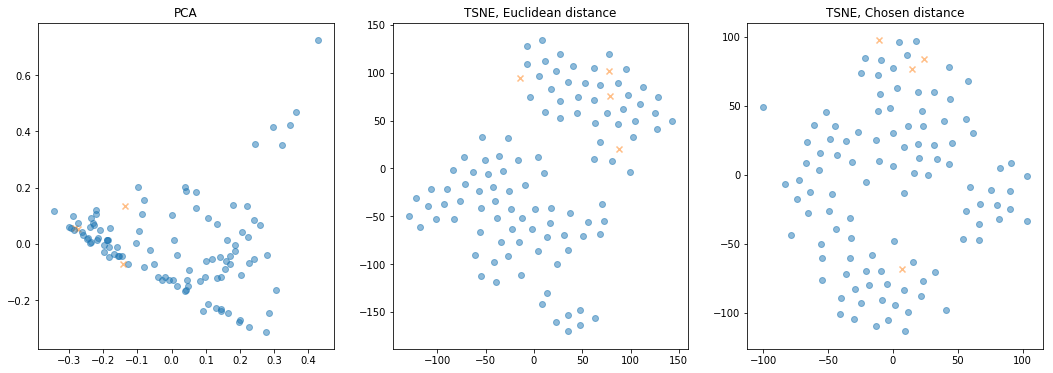

Clustering


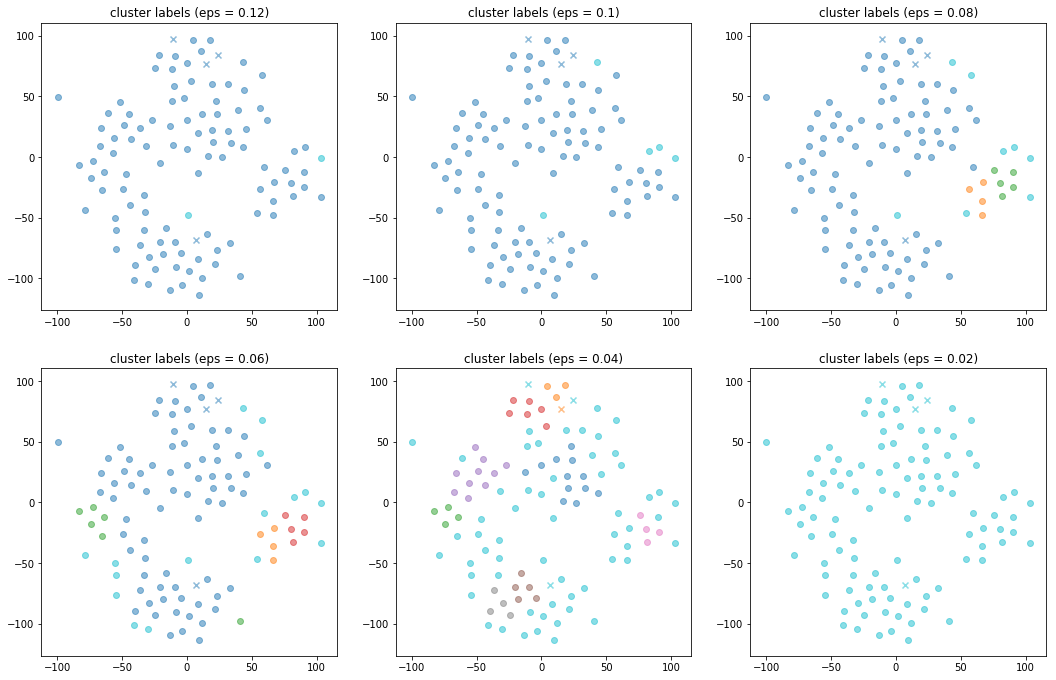

In [14]:
spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)

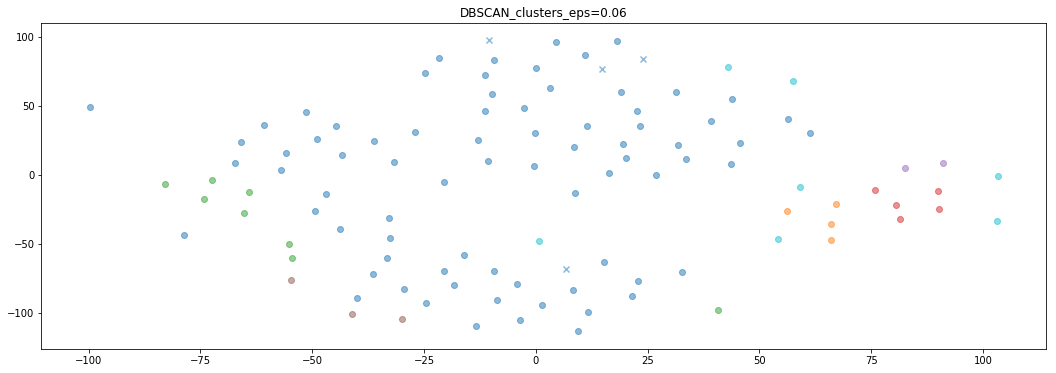

,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,...,s_class,s_simbad,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,tev_glon,tev_glat,marked,DBSCAN_clusters_eps=0.06
11,0.014499,0.216198,0.331077,0.099187,0.322293,0.0,0.010681,0.002273,0.002087,0.000712,...,['B0Ve'],1,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',135.675278,1.086135,1,0
40,0.006512,0.225784,0.309710,0.088960,0.355733,0.0,0.003307,0.002040,0.001594,0.002120,...,['B0Ve'],2,b'1FGL J1018.6-5856 ',b'HMB ',b'1FGL J1018.6-5856',b'bin',284.314087,-1.779517,1,0
88,0.007598,0.117064,0.309349,0.034505,0.203540,0.0,0.118844,0.094852,0.067791,0.035185,...,['B0Ve'],1,b'1FGL J1826.2-1450 ',b'HMB ',b'',b'bin',16.881586,-1.289216,1,0
101,0.022409,0.362261,0.111730,0.253947,0.249653,0.0,0.000000,0.000000,0.000000,0.000000,...,['B0Ve'],1,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',80.299477,1.111117,1,0


0 cluster (tab:blue)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
0,b' ',b'bll ',b'',b'hbl',[],[],0,0
2,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',[],[],0,0
3,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',[],[],0,0
4,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',[],[],0,0
5,b' ',b'bll ',b'',b'hbl',[],[],0,0
6,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',[],[],0,0
7,b'1FGL J0221.0+3555 ',b'FSRQ ',b'',b'blazar',[],[],0,0
11,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',"[""b'LS I +61 303'"" ""b'LS I +61 303'""]",['B0Ve'],1,1
14,b'1FGL J0319.7+4130 ',b'RDG ',b'',b'fri',[],[],0,0
15,b'1FGL J0319.7+1847 ',b'bll ',b'',b'hbl',[],[],0,0


1 cluster (tab:orange)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1,b' ',b'snr ',b'',b'snr',[],[],0,0
49,b'1FGL J1221.5+2814 ',b'bll ',b'',b'ibl',[],[],0,0
57,b' ',b'PSR ',b'',b'pwn',[],[],0,0
66,b'1FGL J1513.2-5904 ',b'PSR ',b'',b'pwn',[],[],0,0


2 cluster (tab:green)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
8,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',[],[],0,0
9,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'unid',[],[],0,0
12,b'1FGL J0303.5-2406 ',b'BLL ',b'',b'hbl',[],[],0,0
20,b'1FGL J0521.7+2114 ',b'bll ',b'',b'ibl',[],[],0,0
31,b'1FGL J0721.9+7120 ',b'BLL ',b'',b'ibl',[],[],0,0
47,b'1FGL J1217.7+3007 ',b'bll ',b'',b'hbl',[],[],0,0
96,b'1FGL J2001.1+4351 ',b'bll ',b'',b'ibl',[],[],0,0
106,b'1FGL J2250.1+3825 ',b'bll ',b'',b'hbl',[],[],0,0


3 cluster (tab:red)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
16,b' ',b'bll ',b'',b'hbl',[],[],0,0
21,b' ',b' ',b'',"b'snr,mc'",[],[],0,0
38,b'1FGL J1015.1+4927 ',b'bll ',b'',b'hbl',[],[],0,0
42,b'1FGL J1103.7-2329 ',b'bll ',b'',b'hbl',[],[],0,0
69,b'1FGL J1555.7+1111 ',b'BLL ',b'',b'hbl',[],[],0,0


4 cluster (tab:purple)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
19,b'1FGL J0507.9+6738 ',b'bll ',b'',b'hbl',[],[],0,0
56,b'1FGL J1325.6-4300 ',b'RDG ',b'',b'fri',[],[],0,0


5 cluster (tab:brown)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
72,b'1FGL J1640.8-4634c',b'spp ',b'',b'pwn',[],[],0,0
89,b'1FGL J1834.3-0842c',b'snr ',b'',b'unid',[],[],0,0
90,b' ',b'PWN ',b'',b'unid',"[""b'LS IV -05 11'"" ""b'[KRL2007b] 332'""]",['B' 'B0Ve'],1,0


6 cluster (tab:pink)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
10,b' ',b'bll ',b'',b'hbl',[],[],0,0
13,b' ',b'rdg ',b'',b'hbl',[],[],0,0
63,b'1FGL J1443.8+2457 ',b'fsrq ',b'3FGL J1443.9+2502',b'fsrq',[],[],0,0
65,b'1FGL J1512.8-0906 ',b'FSRQ ',b'',b'fsrq',[],[],0,0
73,b' ',b'spp ',b'',b'unid',[],[],0,0
83,b' ',b' ',b'',b'unid',"[""b'SSTGC 519103'"" ""b'SSTGC 519103'"" ""b'GCIRS ...",['Be' 'B' 'B' 'O'],1,0
84,b'1FGL J1745.6-2900c',b'spp ',b'',b'unid',"[""b'SSTGC 519103'"" ""b'SSTGC 519103'"" ""b'GCIRS ...",['Be' 'B' 'B' 'O'],1,0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.139507,0.179583,0.179223,0.153924,0.182230,0.0,0.078094,0.033266,0.022497,0.017201,0.014474
1,0.033666,0.061612,0.184107,0.041286,0.114943,0.0,0.314045,0.061764,0.030888,0.035056,0.122632
2,0.182221,0.193188,0.172199,0.204489,0.174455,0.0,0.062836,0.008815,0.001486,0.000253,0.000057
3,0.169085,0.051186,0.011159,0.065171,0.039534,0.0,0.059296,0.024707,0.034945,0.113516,0.431401
4,0.301620,0.098718,0.307294,0.128982,0.163386,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.140246,0.172010,0.040297,0.158788,0.138217,0.0,0.103048,0.115497,0.074589,0.036541,0.020767
6,0.060231,0.167764,0.163139,0.122530,0.152531,0.0,0.087886,0.036468,0.031051,0.027563,0.150838


In [15]:
list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.06, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

In [16]:
spectra_distances.min(), spectra_distances.max()

(0.0, 0.14346802126727987)

* ### euclidean distance

In [17]:
# euclidean distance
from scipy.spatial.distance import euclidean
metric_function = "euclidean"
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

In [18]:
spectra_distances.min(), spectra_distances.max()

(0.0, 1.13132861505431)

Clustering


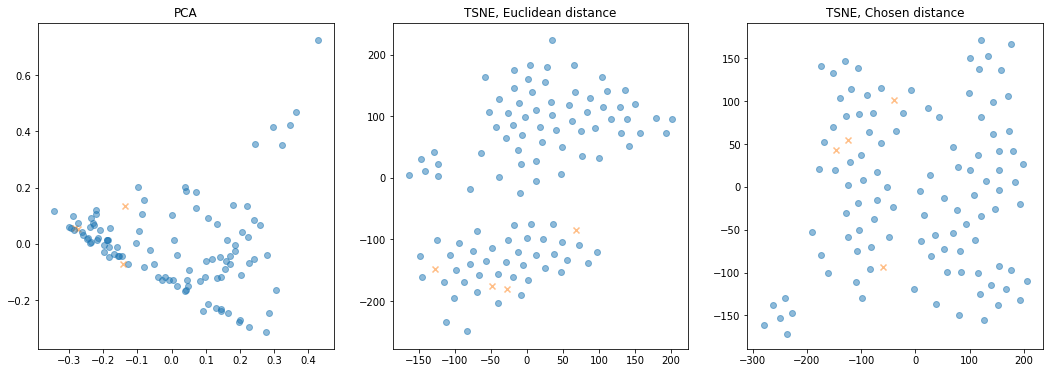

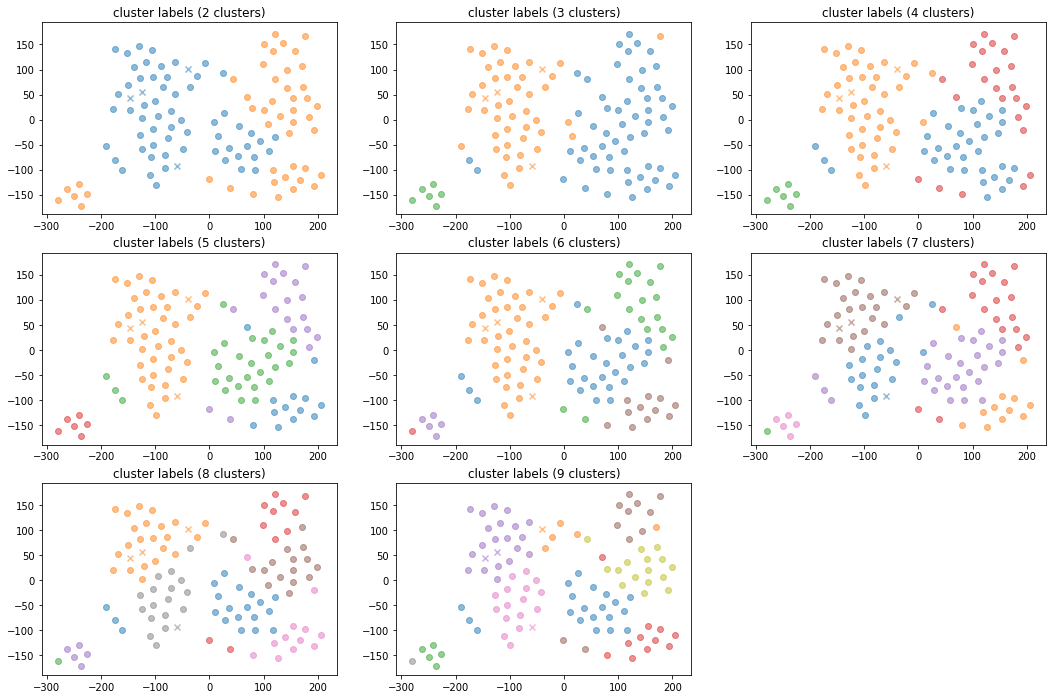

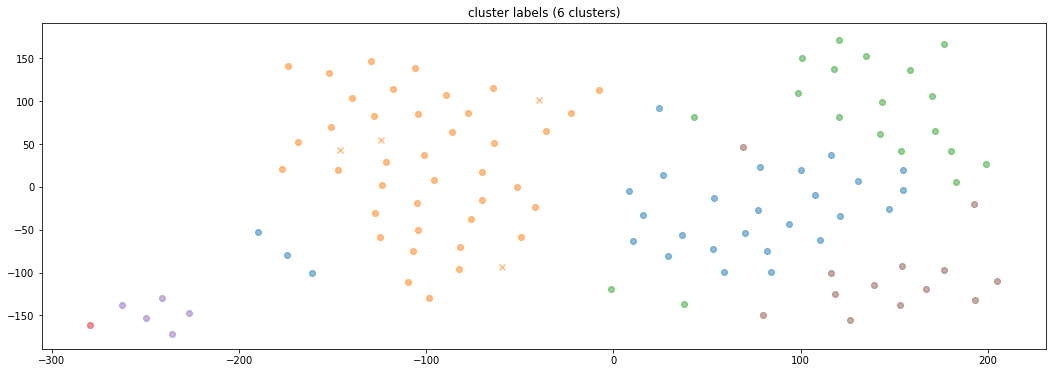

,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,...,s_class,s_simbad,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,tev_glon,tev_glat,marked,KMeans_clusters_6
11,0.014499,0.216198,0.331077,0.099187,0.322293,0.0,0.010681,0.002273,0.002087,0.000712,...,['B0Ve'],1,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',135.675278,1.086135,1,1
40,0.006512,0.225784,0.309710,0.088960,0.355733,0.0,0.003307,0.002040,0.001594,0.002120,...,['B0Ve'],2,b'1FGL J1018.6-5856 ',b'HMB ',b'1FGL J1018.6-5856',b'bin',284.314087,-1.779517,1,1
88,0.007598,0.117064,0.309349,0.034505,0.203540,0.0,0.118844,0.094852,0.067791,0.035185,...,['B0Ve'],1,b'1FGL J1826.2-1450 ',b'HMB ',b'',b'bin',16.881586,-1.289216,1,1
101,0.022409,0.362261,0.111730,0.253947,0.249653,0.0,0.000000,0.000000,0.000000,0.000000,...,['B0Ve'],1,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',80.299477,1.111117,1,1


0 cluster (tab:blue)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
3,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',[],[],0,0
8,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',[],[],0,0
9,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'unid',[],[],0,0
12,b'1FGL J0303.5-2406 ',b'BLL ',b'',b'hbl',[],[],0,0
18,b'1FGL J0449.5-4350 ',b'bll ',b'',b'hbl',[],[],0,0
20,b'1FGL J0521.7+2114 ',b'bll ',b'',b'ibl',[],[],0,0
31,b'1FGL J0721.9+7120 ',b'BLL ',b'',b'ibl',[],[],0,0
32,b'1FGL J0809.5+5219 ',b'bll ',b'',b'hbl',[],[],0,0
43,b'1FGL J1104.4+3812 ',b'BLL ',b'',b'hbl',[],[],0,0
46,b'1FGL J1136.2+6739 ',b'bll ',b'',b'hbl',[],[],0,0


1 cluster (tab:orange)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
6,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',[],[],0,0
7,b'1FGL J0221.0+3555 ',b'FSRQ ',b'',b'blazar',[],[],0,0
11,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',"[""b'LS I +61 303'"" ""b'LS I +61 303'""]",['B0Ve'],1,1
14,b'1FGL J0319.7+4130 ',b'RDG ',b'',b'fri',[],[],0,0
23,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'psr',[],[],0,0
25,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'pwn',[],[],0,0
27,b'1FGL J0633.9+1746 ',b'PSR ',b'',"b'psr,pwn'",[],[],0,0
33,b' ',b'PWN ',b'',b'pwn',[],[],0,0
35,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',"[""b'[CHP2004] J095549.8+693934'"" ""b'[MTK2001b]...",['B0Ve'],2,0
36,b'1FGL J1000.1+6539 ',b'bll ',b'',b'blazar',[],[],0,0


2 cluster (tab:green)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
0,b' ',b'bll ',b'',b'hbl',[],[],0,0
5,b' ',b'bll ',b'',b'hbl',[],[],0,0
10,b' ',b'bll ',b'',b'hbl',[],[],0,0
17,b'1FGL J0416.8+0107 ',b'bll ',b'',b'hbl',[],[],0,0
24,b' ',b'PWN ',b'',b'pwn',[],[],0,0
28,b'1FGL J0648.8+1516 ',b'bll ',b'1FGL J0648.8+1516',b'hbl',[],[],0,0
30,b'1FGL J0710.6+5911 ',b'bll ',b'1FGL J0710.6+5911',b'hbl',[],[],0,0
37,b' ',b'bll ',b'',b'hbl',[],[],0,0
45,b'1FGL J1136.6+7009 ',b'bll ',b'',b'hbl',[],[],0,0
49,b'1FGL J1221.5+2814 ',b'bll ',b'',b'ibl',[],[],0,0


3 cluster (tab:red)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
65,b'1FGL J1512.8-0906 ',b'FSRQ ',b'',b'fsrq',[],[],0,0


4 cluster (tab:purple)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1,b' ',b'snr ',b'',b'snr',[],[],0,0
16,b' ',b'bll ',b'',b'hbl',[],[],0,0
38,b'1FGL J1015.1+4927 ',b'bll ',b'',b'hbl',[],[],0,0
42,b'1FGL J1103.7-2329 ',b'bll ',b'',b'hbl',[],[],0,0
69,b'1FGL J1555.7+1111 ',b'BLL ',b'',b'hbl',[],[],0,0


5 cluster (tab:brown)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
2,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',[],[],0,0
4,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',[],[],0,0
13,b' ',b'rdg ',b'',b'hbl',[],[],0,0
15,b'1FGL J0319.7+1847 ',b'bll ',b'',b'hbl',[],[],0,0
19,b'1FGL J0507.9+6738 ',b'bll ',b'',b'hbl',[],[],0,0
21,b' ',b' ',b'',"b'snr,mc'",[],[],0,0
22,b' ',b'PWN ',b'',b'psr',[],[],0,0
26,b' ',b'bll ',b'',b'hbl',[],[],0,0
29,b'1FGL J0650.7+2503 ',b'bll ',b'',b'hbl',[],[],0,0
34,b'1FGL J0847.2+1134 ',b'bll ',"b'1FGL J0847.2+113,2FGL J0847.2+1134,3FGL J084...",b'hbl',[],[],0,0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.204113,0.168191,0.132884,0.201579,0.135431,0.0,0.076896,0.033963,0.020694,0.012426,0.013823
1,0.031743,0.224935,0.281212,0.122566,0.273851,0.0,0.024443,0.015224,0.011037,0.009078,0.005912
2,0.125595,0.082752,0.099948,0.094567,0.082094,0.0,0.280246,0.095703,0.061352,0.043490,0.034252
3,0.000057,0.000393,0.000838,0.000202,0.000636,0.0,0.000009,0.000187,0.002927,0.059691,0.935061
4,0.078004,0.041391,0.011833,0.049710,0.049516,0.0,0.080082,0.021528,0.027624,0.120868,0.519442
5,0.399042,0.164704,0.047170,0.236372,0.081918,0.0,0.022925,0.013262,0.014637,0.012300,0.007671


In [19]:
spectra_2D = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)
list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 6, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

[1.2000000000000002, 1.0, 0.8, 0.6000000000000001, 0.4, 0.2, 0.1]


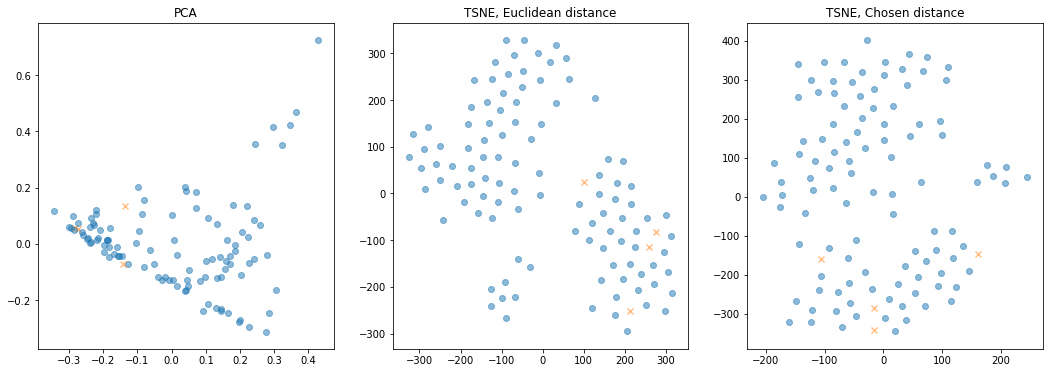

Clustering


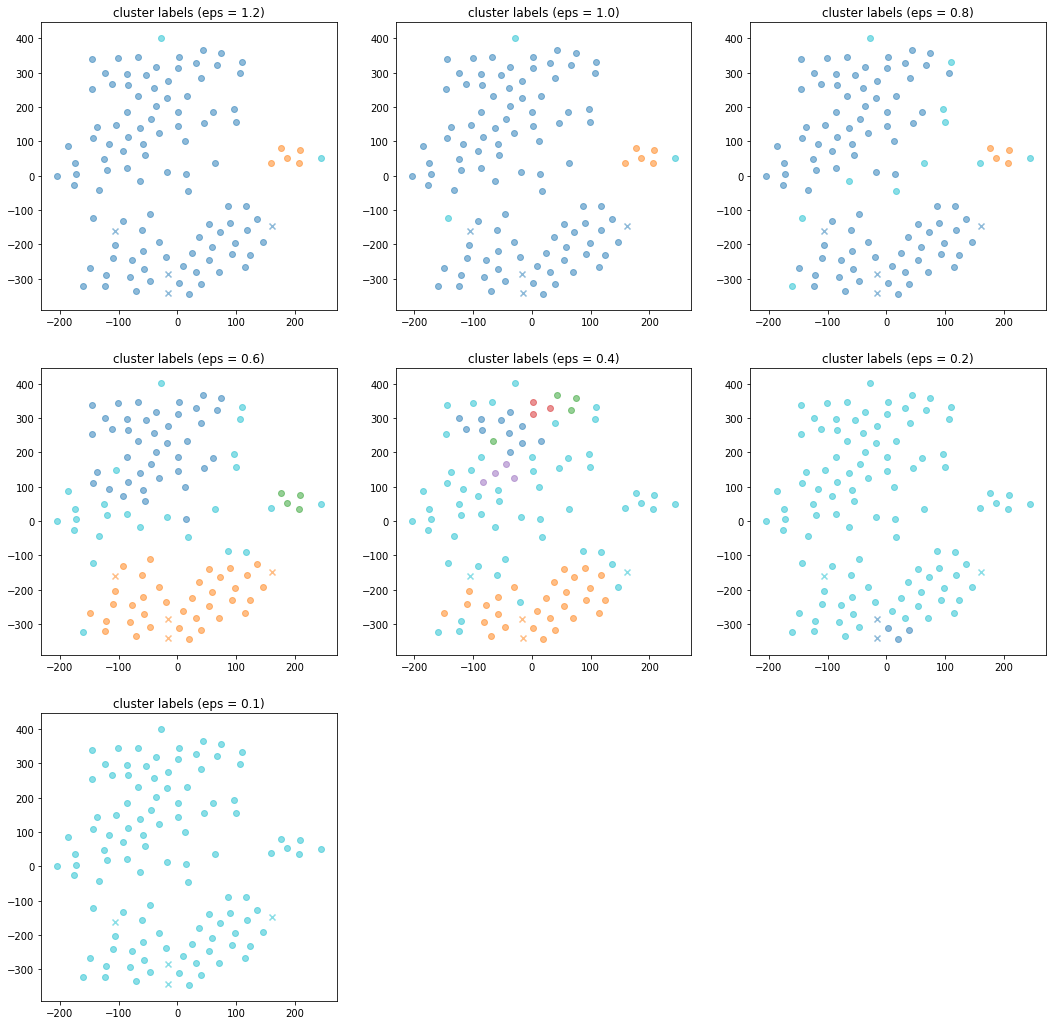

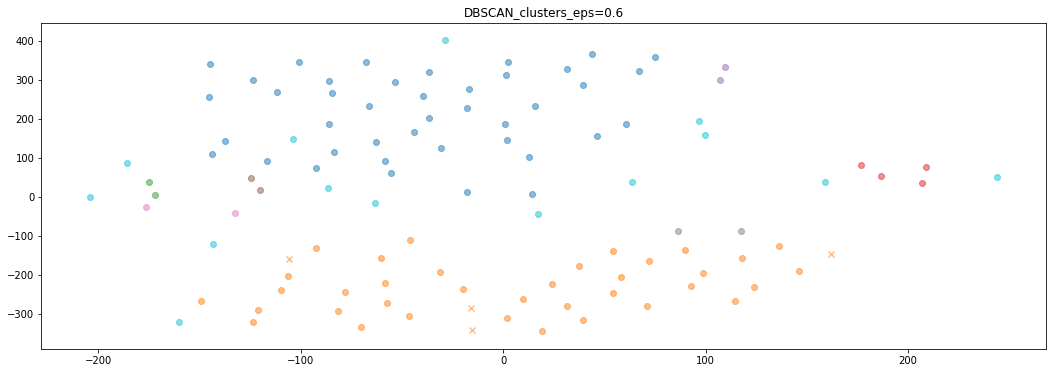

,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,...,s_class,s_simbad,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,tev_glon,tev_glat,marked,DBSCAN_clusters_eps=0.6
11,0.014499,0.216198,0.331077,0.099187,0.322293,0.0,0.010681,0.002273,0.002087,0.000712,...,['B0Ve'],1,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',135.675278,1.086135,1,1
40,0.006512,0.225784,0.309710,0.088960,0.355733,0.0,0.003307,0.002040,0.001594,0.002120,...,['B0Ve'],2,b'1FGL J1018.6-5856 ',b'HMB ',b'1FGL J1018.6-5856',b'bin',284.314087,-1.779517,1,1
88,0.007598,0.117064,0.309349,0.034505,0.203540,0.0,0.118844,0.094852,0.067791,0.035185,...,['B0Ve'],1,b'1FGL J1826.2-1450 ',b'HMB ',b'',b'bin',16.881586,-1.289216,1,1
101,0.022409,0.362261,0.111730,0.253947,0.249653,0.0,0.000000,0.000000,0.000000,0.000000,...,['B0Ve'],1,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',80.299477,1.111117,1,1


0 cluster (tab:blue)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
2,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',[],[],0,0
3,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',[],[],0,0
4,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',[],[],0,0
5,b' ',b'bll ',b'',b'hbl',[],[],0,0
8,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',[],[],0,0
9,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'unid',[],[],0,0
12,b'1FGL J0303.5-2406 ',b'BLL ',b'',b'hbl',[],[],0,0
17,b'1FGL J0416.8+0107 ',b'bll ',b'',b'hbl',[],[],0,0
18,b'1FGL J0449.5-4350 ',b'bll ',b'',b'hbl',[],[],0,0
20,b'1FGL J0521.7+2114 ',b'bll ',b'',b'ibl',[],[],0,0


1 cluster (tab:orange)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
6,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',[],[],0,0
7,b'1FGL J0221.0+3555 ',b'FSRQ ',b'',b'blazar',[],[],0,0
11,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',"[""b'LS I +61 303'"" ""b'LS I +61 303'""]",['B0Ve'],1,1
14,b'1FGL J0319.7+4130 ',b'RDG ',b'',b'fri',[],[],0,0
23,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'psr',[],[],0,0
25,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'pwn',[],[],0,0
27,b'1FGL J0633.9+1746 ',b'PSR ',b'',"b'psr,pwn'",[],[],0,0
33,b' ',b'PWN ',b'',b'pwn',[],[],0,0
35,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',"[""b'[CHP2004] J095549.8+693934'"" ""b'[MTK2001b]...",['B0Ve'],2,0
36,b'1FGL J1000.1+6539 ',b'bll ',b'',b'blazar',[],[],0,0


2 cluster (tab:green)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
10,b' ',b'bll ',b'',b'hbl',[],[],0,0
49,b'1FGL J1221.5+2814 ',b'bll ',b'',b'ibl',[],[],0,0


3 cluster (tab:red)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
16,b' ',b'bll ',b'',b'hbl',[],[],0,0
38,b'1FGL J1015.1+4927 ',b'bll ',b'',b'hbl',[],[],0,0
42,b'1FGL J1103.7-2329 ',b'bll ',b'',b'hbl',[],[],0,0
69,b'1FGL J1555.7+1111 ',b'BLL ',b'',b'hbl',[],[],0,0


4 cluster (tab:purple)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
19,b'1FGL J0507.9+6738 ',b'bll ',b'',b'hbl',[],[],0,0
21,b' ',b' ',b'',"b'snr,mc'",[],[],0,0


5 cluster (tab:brown)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
67,b'1FGL J1514.7-5917 ',b'PWN ',b'',b'pwn',[],[],0,0
75,b'1FGL J1711.7-3944c',b'SNR ',b'',b'snr',[],[],0,0


6 cluster (tab:pink)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
71,b'1FGL J1626.0-4917c',b' ',b'',b'unid',[],[],0,0
103,b'1FGL J2202.8+4216 ',b'BLL ',b'',b'lbl',[],[],0,0


7 cluster (tab:gray)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
78,b'1FGL J1718.2-3825 ',b'PSR ',b'',b'pwn',[],[],0,0
83,b' ',b' ',b'',b'unid',"[""b'SSTGC 519103'"" ""b'SSTGC 519103'"" ""b'GCIRS ...",['Be' 'B' 'B' 'O'],1,0


8 cluster (tab:olive)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
0,b' ',b'bll ',b'',b'hbl',[],[],0,0
1,b' ',b'snr ',b'',b'snr',[],[],0,0
13,b' ',b'rdg ',b'',b'hbl',[],[],0,0
15,b'1FGL J0319.7+1847 ',b'bll ',b'',b'hbl',[],[],0,0
37,b' ',b'bll ',b'',b'hbl',[],[],0,0
54,b' ',b'PWN ',b'',b'pwn',[],[],0,0
56,b'1FGL J1325.6-4300 ',b'RDG ',b'',b'fri',[],[],0,0
57,b' ',b'PSR ',b'',b'pwn',[],[],0,0
61,b'1FGL J1428.7+4239 ',b'bll ',b'',b'hbl',[],[],0,0
63,b'1FGL J1443.8+2457 ',b'fsrq ',b'3FGL J1443.9+2502',b'fsrq',[],[],0,0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.248633,0.158085,0.107030,0.205978,0.120482,0.0,0.091690,0.034317,0.018547,0.010095,0.005143
1,0.032888,0.221966,0.286713,0.123237,0.270842,0.0,0.023507,0.015013,0.010990,0.008565,0.006279
2,0.060169,0.082907,0.083162,0.062948,0.116254,0.0,0.430465,0.074349,0.051581,0.017284,0.020881
3,0.080226,0.033446,0.013939,0.052557,0.025492,0.0,0.066585,0.021803,0.032917,0.136241,0.536796
4,0.547815,0.108563,0.017778,0.159250,0.095614,0.0,0.015071,0.018160,0.021529,0.011310,0.004911
5,0.137315,0.042411,0.014698,0.070713,0.040389,0.0,0.289479,0.161023,0.132168,0.081187,0.030617
6,0.029337,0.081158,0.212772,0.054826,0.133726,0.0,0.323275,0.071834,0.035809,0.031051,0.026210
7,0.008641,0.345555,0.022271,0.142874,0.355329,0.0,0.055392,0.027048,0.017494,0.023866,0.001531
8,0.117649,0.106233,0.126518,0.104775,0.077324,0.0,0.145284,0.064616,0.050156,0.054118,0.153326


In [20]:
eps_l = [0.1 * i for i in range(12, 0, -2)] + [0.1]
print(eps_l)
spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, eps_l=eps_l, TSNE_learning_rate=1000, TSNE_n_iter=1500, TSNE_learning_rate2=900)
list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.6, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

* ### cosine distance

In [21]:
# cosine distance
# from scipy.spatial.distance import cosine
metric_function = "cosine"
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

Clustering


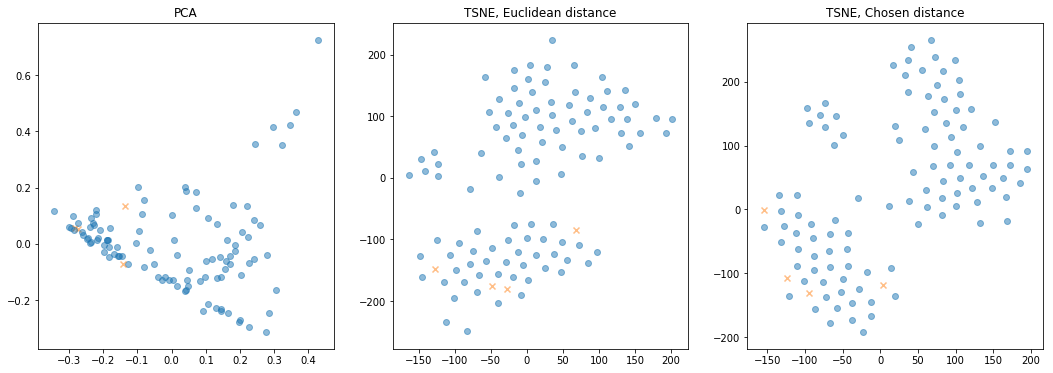

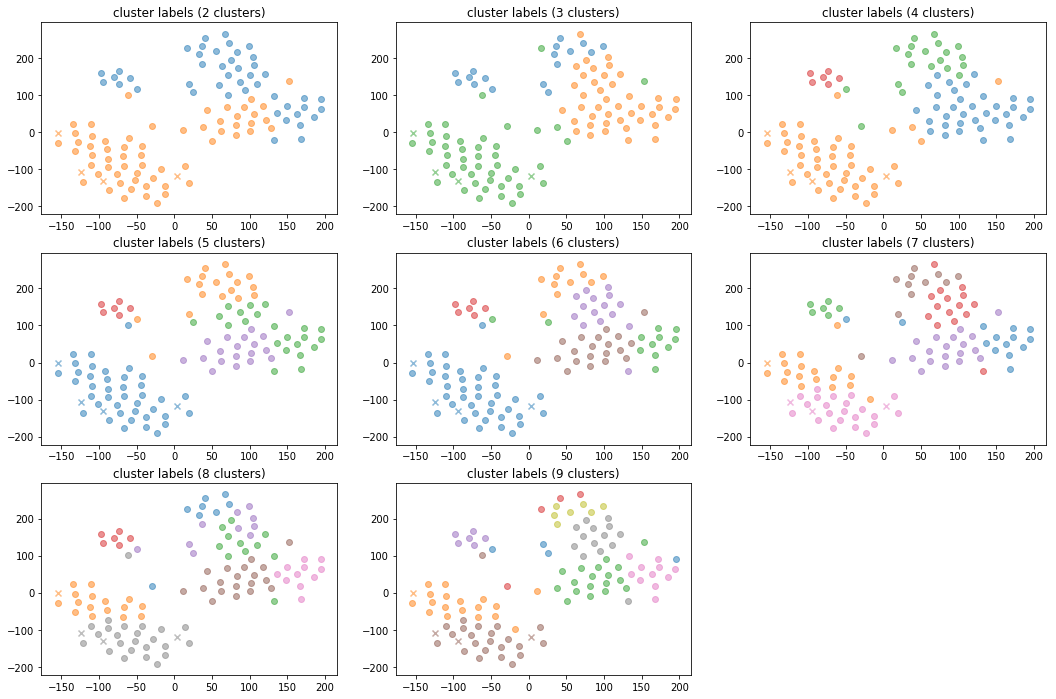

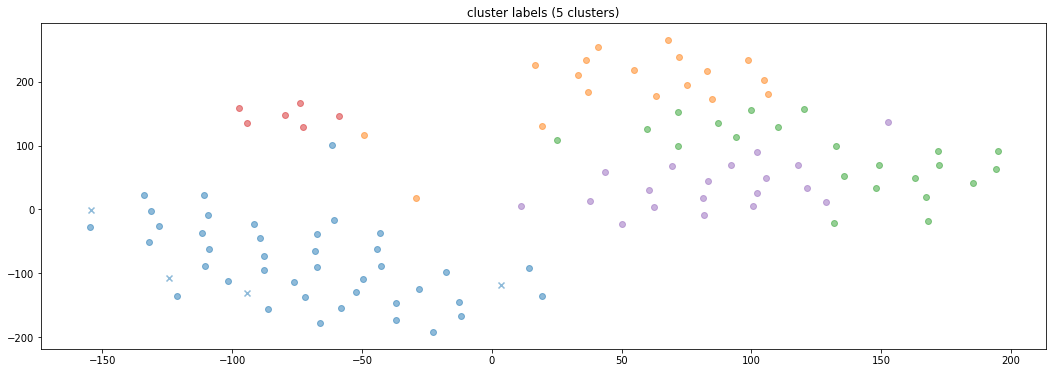

,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,...,s_class,s_simbad,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,tev_glon,tev_glat,marked,KMeans_clusters_5
11,0.014499,0.216198,0.331077,0.099187,0.322293,0.0,0.010681,0.002273,0.002087,0.000712,...,['B0Ve'],1,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',135.675278,1.086135,1,0
40,0.006512,0.225784,0.309710,0.088960,0.355733,0.0,0.003307,0.002040,0.001594,0.002120,...,['B0Ve'],2,b'1FGL J1018.6-5856 ',b'HMB ',b'1FGL J1018.6-5856',b'bin',284.314087,-1.779517,1,0
88,0.007598,0.117064,0.309349,0.034505,0.203540,0.0,0.118844,0.094852,0.067791,0.035185,...,['B0Ve'],1,b'1FGL J1826.2-1450 ',b'HMB ',b'',b'bin',16.881586,-1.289216,1,0
101,0.022409,0.362261,0.111730,0.253947,0.249653,0.0,0.000000,0.000000,0.000000,0.000000,...,['B0Ve'],1,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',80.299477,1.111117,1,0


0 cluster (tab:blue)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
6,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',[],[],0,0
7,b'1FGL J0221.0+3555 ',b'FSRQ ',b'',b'blazar',[],[],0,0
11,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',"[""b'LS I +61 303'"" ""b'LS I +61 303'""]",['B0Ve'],1,1
14,b'1FGL J0319.7+4130 ',b'RDG ',b'',b'fri',[],[],0,0
23,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'psr',[],[],0,0
25,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'pwn',[],[],0,0
27,b'1FGL J0633.9+1746 ',b'PSR ',b'',"b'psr,pwn'",[],[],0,0
33,b' ',b'PWN ',b'',b'pwn',[],[],0,0
35,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',"[""b'[CHP2004] J095549.8+693934'"" ""b'[MTK2001b]...",['B0Ve'],2,0
36,b'1FGL J1000.1+6539 ',b'bll ',b'',b'blazar',[],[],0,0


1 cluster (tab:orange)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
0,b' ',b'bll ',b'',b'hbl',[],[],0,0
5,b' ',b'bll ',b'',b'hbl',[],[],0,0
10,b' ',b'bll ',b'',b'hbl',[],[],0,0
17,b'1FGL J0416.8+0107 ',b'bll ',b'',b'hbl',[],[],0,0
24,b' ',b'PWN ',b'',b'pwn',[],[],0,0
30,b'1FGL J0710.6+5911 ',b'bll ',b'1FGL J0710.6+5911',b'hbl',[],[],0,0
37,b' ',b'bll ',b'',b'hbl',[],[],0,0
45,b'1FGL J1136.6+7009 ',b'bll ',b'',b'hbl',[],[],0,0
49,b'1FGL J1221.5+2814 ',b'bll ',b'',b'ibl',[],[],0,0
54,b' ',b'PWN ',b'',b'pwn',[],[],0,0


2 cluster (tab:green)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
2,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',[],[],0,0
4,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',[],[],0,0
13,b' ',b'rdg ',b'',b'hbl',[],[],0,0
15,b'1FGL J0319.7+1847 ',b'bll ',b'',b'hbl',[],[],0,0
19,b'1FGL J0507.9+6738 ',b'bll ',b'',b'hbl',[],[],0,0
21,b' ',b' ',b'',"b'snr,mc'",[],[],0,0
22,b' ',b'PWN ',b'',b'psr',[],[],0,0
26,b' ',b'bll ',b'',b'hbl',[],[],0,0
28,b'1FGL J0648.8+1516 ',b'bll ',b'1FGL J0648.8+1516',b'hbl',[],[],0,0
29,b'1FGL J0650.7+2503 ',b'bll ',b'',b'hbl',[],[],0,0


3 cluster (tab:red)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1,b' ',b'snr ',b'',b'snr',[],[],0,0
16,b' ',b'bll ',b'',b'hbl',[],[],0,0
38,b'1FGL J1015.1+4927 ',b'bll ',b'',b'hbl',[],[],0,0
42,b'1FGL J1103.7-2329 ',b'bll ',b'',b'hbl',[],[],0,0
65,b'1FGL J1512.8-0906 ',b'FSRQ ',b'',b'fsrq',[],[],0,0
69,b'1FGL J1555.7+1111 ',b'BLL ',b'',b'hbl',[],[],0,0


4 cluster (tab:purple)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
3,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',[],[],0,0
8,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',[],[],0,0
9,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'unid',[],[],0,0
12,b'1FGL J0303.5-2406 ',b'BLL ',b'',b'hbl',[],[],0,0
18,b'1FGL J0449.5-4350 ',b'bll ',b'',b'hbl',[],[],0,0
20,b'1FGL J0521.7+2114 ',b'bll ',b'',b'ibl',[],[],0,0
31,b'1FGL J0721.9+7120 ',b'BLL ',b'',b'ibl',[],[],0,0
32,b'1FGL J0809.5+5219 ',b'bll ',b'',b'hbl',[],[],0,0
46,b'1FGL J1136.2+6739 ',b'bll ',b'',b'hbl',[],[],0,0
47,b'1FGL J1217.7+3007 ',b'bll ',b'',b'hbl',[],[],0,0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.032346,0.222880,0.279030,0.122676,0.270646,0.0,0.024558,0.014991,0.010993,0.010075,0.011805
1,0.118852,0.078672,0.104445,0.088257,0.081836,0.0,0.280391,0.100731,0.064754,0.045906,0.036155
2,0.321529,0.159025,0.045332,0.216903,0.087437,0.0,0.077900,0.039879,0.028251,0.016300,0.007444
3,0.065013,0.034558,0.010000,0.041459,0.041370,0.0,0.066737,0.017971,0.023507,0.110672,0.588712
4,0.211460,0.177559,0.166865,0.211891,0.151963,0.0,0.051864,0.012962,0.007328,0.005065,0.003042


In [22]:
spectra_2D = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)
list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 5, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

[1.0, 0.8, 0.6000000000000001, 0.4, 0.2, 0.1]


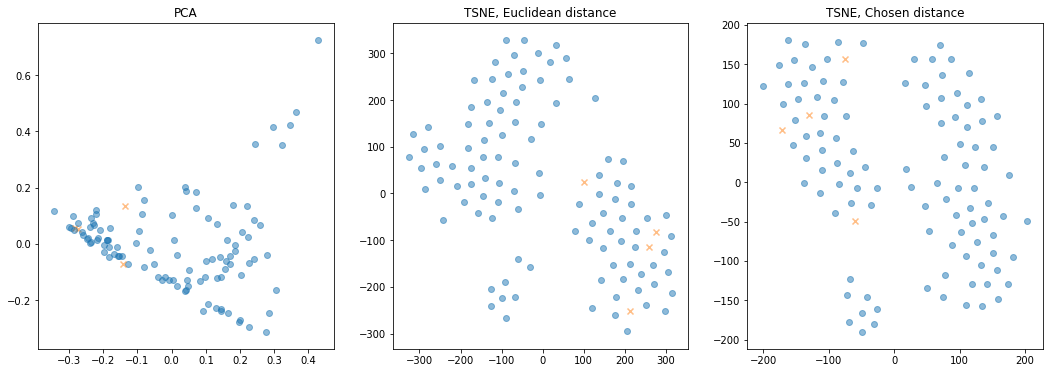

Clustering


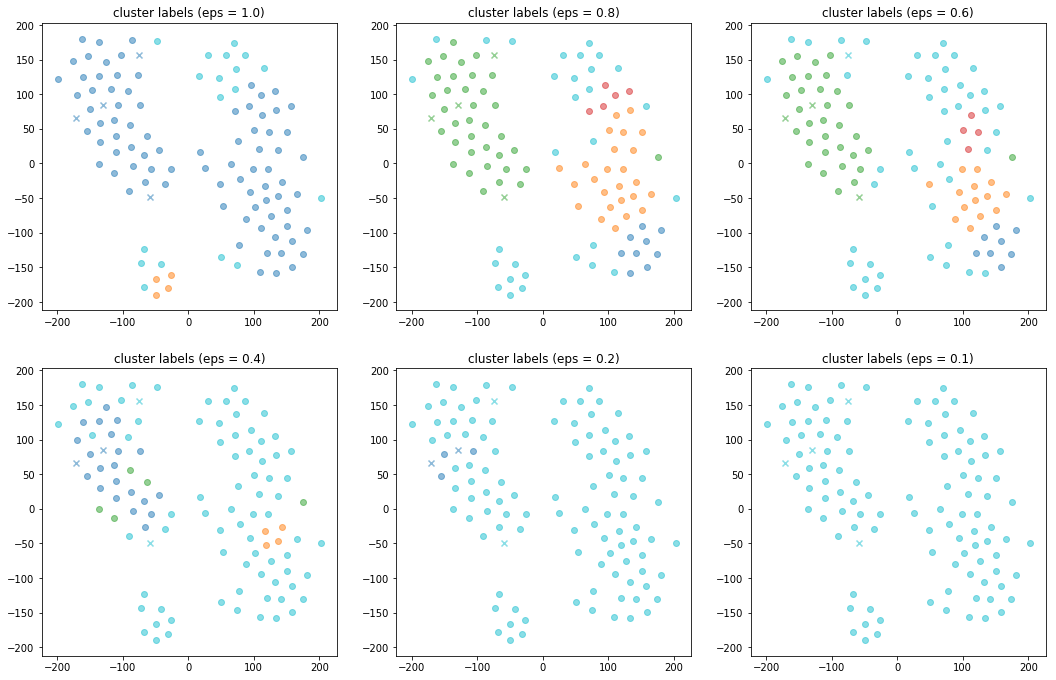

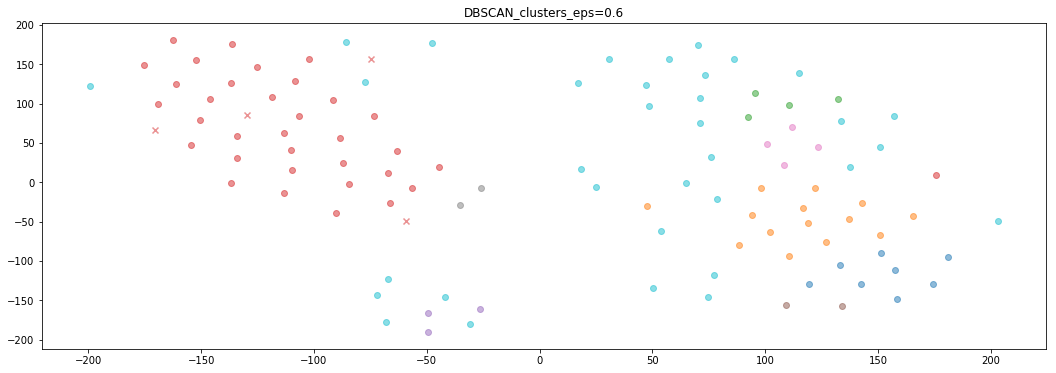

,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,...,s_class,s_simbad,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,tev_glon,tev_glat,marked,DBSCAN_clusters_eps=0.6
11,0.014499,0.216198,0.331077,0.099187,0.322293,0.0,0.010681,0.002273,0.002087,0.000712,...,['B0Ve'],1,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',135.675278,1.086135,1,3
40,0.006512,0.225784,0.309710,0.088960,0.355733,0.0,0.003307,0.002040,0.001594,0.002120,...,['B0Ve'],2,b'1FGL J1018.6-5856 ',b'HMB ',b'1FGL J1018.6-5856',b'bin',284.314087,-1.779517,1,3
88,0.007598,0.117064,0.309349,0.034505,0.203540,0.0,0.118844,0.094852,0.067791,0.035185,...,['B0Ve'],1,b'1FGL J1826.2-1450 ',b'HMB ',b'',b'bin',16.881586,-1.289216,1,3
101,0.022409,0.362261,0.111730,0.253947,0.249653,0.0,0.000000,0.000000,0.000000,0.000000,...,['B0Ve'],1,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',80.299477,1.111117,1,3


0 cluster (tab:blue)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
2,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',[],[],0,0
4,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',[],[],0,0
22,b' ',b'PWN ',b'',b'psr',[],[],0,0
26,b' ',b'bll ',b'',b'hbl',[],[],0,0
29,b'1FGL J0650.7+2503 ',b'bll ',b'',b'hbl',[],[],0,0
34,b'1FGL J0847.2+1134 ',b'bll ',"b'1FGL J0847.2+113,2FGL J0847.2+1134,3FGL J084...",b'hbl',[],[],0,0
48,b'1FGL J1221.3+3008 ',b'bll ',b'',b'hbl',[],[],0,0
105,b'1FGL J2244.0+2021 ',b'bll ',b'',b'ibl',[],[],0,0


1 cluster (tab:orange)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
3,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',[],[],0,0
8,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',[],[],0,0
9,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'unid',[],[],0,0
12,b'1FGL J0303.5-2406 ',b'BLL ',b'',b'hbl',[],[],0,0
18,b'1FGL J0449.5-4350 ',b'bll ',b'',b'hbl',[],[],0,0
20,b'1FGL J0521.7+2114 ',b'bll ',b'',b'ibl',[],[],0,0
32,b'1FGL J0809.5+5219 ',b'bll ',b'',b'hbl',[],[],0,0
46,b'1FGL J1136.2+6739 ',b'bll ',b'',b'hbl',[],[],0,0
47,b'1FGL J1217.7+3007 ',b'bll ',b'',b'hbl',[],[],0,0
60,b'1FGL J1426.9+2347 ',b'BLL ',b'',b'hbl',[],[],0,0


2 cluster (tab:green)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
5,b' ',b'bll ',b'',b'hbl',[],[],0,0
17,b'1FGL J0416.8+0107 ',b'bll ',b'',b'hbl',[],[],0,0
24,b' ',b'PWN ',b'',b'pwn',[],[],0,0
45,b'1FGL J1136.6+7009 ',b'bll ',b'',b'hbl',[],[],0,0


3 cluster (tab:red)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
6,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',[],[],0,0
7,b'1FGL J0221.0+3555 ',b'FSRQ ',b'',b'blazar',[],[],0,0
11,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',"[""b'LS I +61 303'"" ""b'LS I +61 303'""]",['B0Ve'],1,1
14,b'1FGL J0319.7+4130 ',b'RDG ',b'',b'fri',[],[],0,0
23,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'psr',[],[],0,0
25,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'pwn',[],[],0,0
27,b'1FGL J0633.9+1746 ',b'PSR ',b'',"b'psr,pwn'",[],[],0,0
35,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',"[""b'[CHP2004] J095549.8+693934'"" ""b'[MTK2001b]...",['B0Ve'],2,0
36,b'1FGL J1000.1+6539 ',b'bll ',b'',b'blazar',[],[],0,0
39,b' ',b'PSR ',b'',b'pwn',[],[],0,0


4 cluster (tab:purple)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
16,b' ',b'bll ',b'',b'hbl',[],[],0,0
38,b'1FGL J1015.1+4927 ',b'bll ',b'',b'hbl',[],[],0,0
42,b'1FGL J1103.7-2329 ',b'bll ',b'',b'hbl',[],[],0,0


5 cluster (tab:brown)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
19,b'1FGL J0507.9+6738 ',b'bll ',b'',b'hbl',[],[],0,0
21,b' ',b' ',b'',"b'snr,mc'",[],[],0,0


6 cluster (tab:pink)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
43,b'1FGL J1104.4+3812 ',b'BLL ',b'',b'hbl',[],[],0,0
81,b'1FGL J1744.2+1934 ',b'bll ',b'',b'hbl',[],[],0,0
97,b'1FGL J2009.5-4849 ',b'BLL ',b'',b'hbl',[],[],0,0
108,b'1FGL J2347.1+5142 ',b'bll ',b'',b'hbl',[],[],0,0


7 cluster (tab:gray)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
78,b'1FGL J1718.2-3825 ',b'PSR ',b'',b'pwn',[],[],0,0
83,b' ',b' ',b'',b'unid',"[""b'SSTGC 519103'"" ""b'SSTGC 519103'"" ""b'GCIRS ...",['Be' 'B' 'B' 'O'],1,0


8 cluster (tab:olive)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
0,b' ',b'bll ',b'',b'hbl',[],[],0,0
1,b' ',b'snr ',b'',b'snr',[],[],0,0
10,b' ',b'bll ',b'',b'hbl',[],[],0,0
13,b' ',b'rdg ',b'',b'hbl',[],[],0,0
15,b'1FGL J0319.7+1847 ',b'bll ',b'',b'hbl',[],[],0,0
28,b'1FGL J0648.8+1516 ',b'bll ',b'1FGL J0648.8+1516',b'hbl',[],[],0,0
30,b'1FGL J0710.6+5911 ',b'bll ',b'1FGL J0710.6+5911',b'hbl',[],[],0,0
31,b'1FGL J0721.9+7120 ',b'BLL ',b'',b'ibl',[],[],0,0
33,b' ',b'PWN ',b'',b'pwn',[],[],0,0
37,b' ',b'bll ',b'',b'hbl',[],[],0,0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.397970,0.159093,0.071110,0.270115,0.101712,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.234689,0.183576,0.155607,0.219510,0.158119,0.0,0.035007,0.006854,0.003940,0.002289,0.000408
2,0.219713,0.103801,0.047714,0.119595,0.082501,0.0,0.288056,0.080292,0.035617,0.016046,0.006664
3,0.030932,0.225598,0.295325,0.125663,0.277764,0.0,0.019412,0.010509,0.007172,0.004807,0.002816
4,0.061476,0.026688,0.011000,0.040490,0.021469,0.0,0.080185,0.028454,0.040043,0.153042,0.537152
5,0.547815,0.108563,0.017778,0.159250,0.095614,0.0,0.015071,0.018160,0.021529,0.011310,0.004911
6,0.219936,0.135962,0.073579,0.186449,0.089663,0.0,0.189066,0.065422,0.028498,0.007925,0.003500
7,0.008641,0.345555,0.022271,0.142874,0.355329,0.0,0.055392,0.027048,0.017494,0.023866,0.001531
8,0.127743,0.115866,0.112267,0.119816,0.094213,0.0,0.167927,0.072066,0.052021,0.045543,0.092539


In [23]:
eps_l = [0.1 * i for i in range(10, 0, -2)] + [0.1]
print(eps_l)
spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, eps_l=eps_l, TSNE_learning_rate=1000, TSNE_n_iter=1500, TSNE_learning_rate2=900)
list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.6, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

* ### energy distance

In [24]:
# energy distance
metric_function = st.energy_distance
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

Clustering


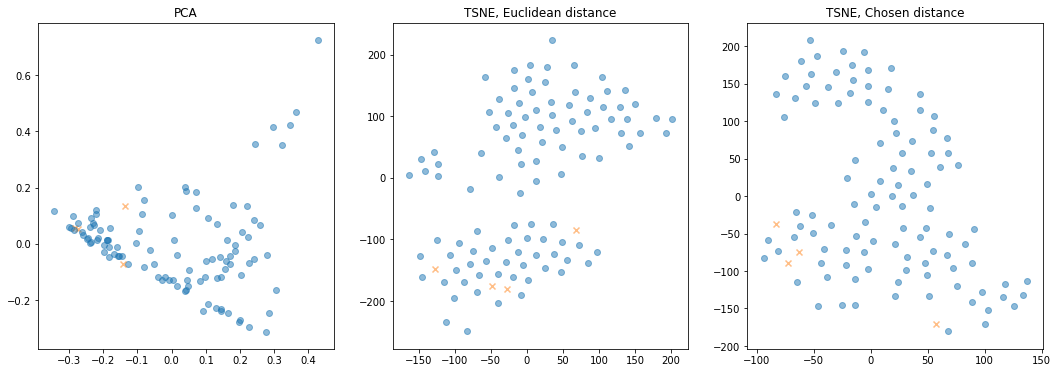

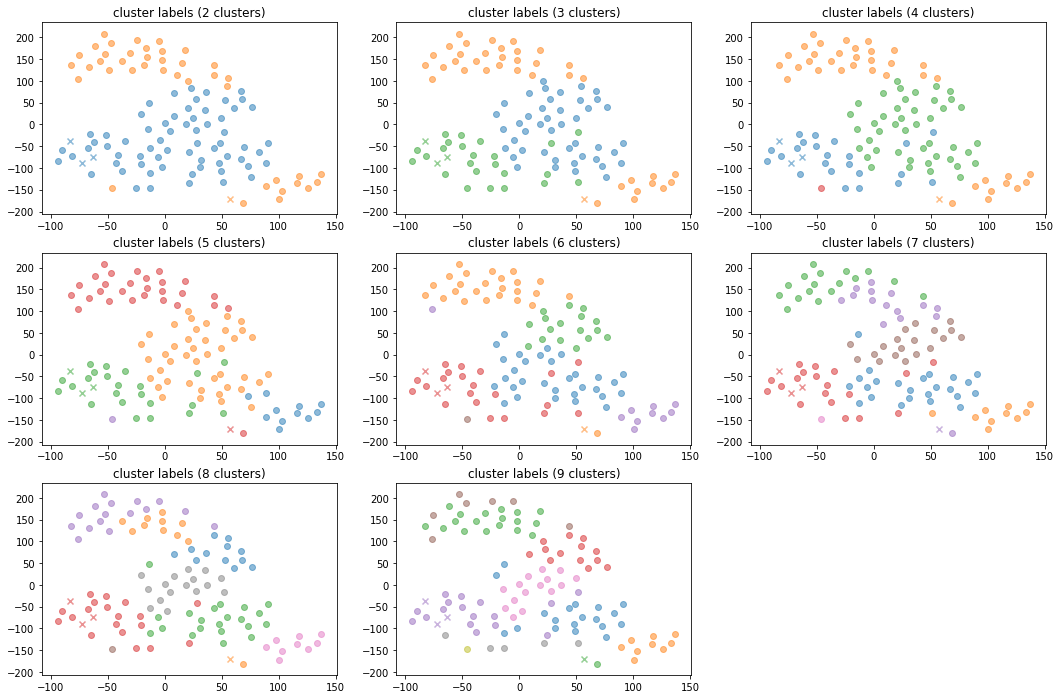

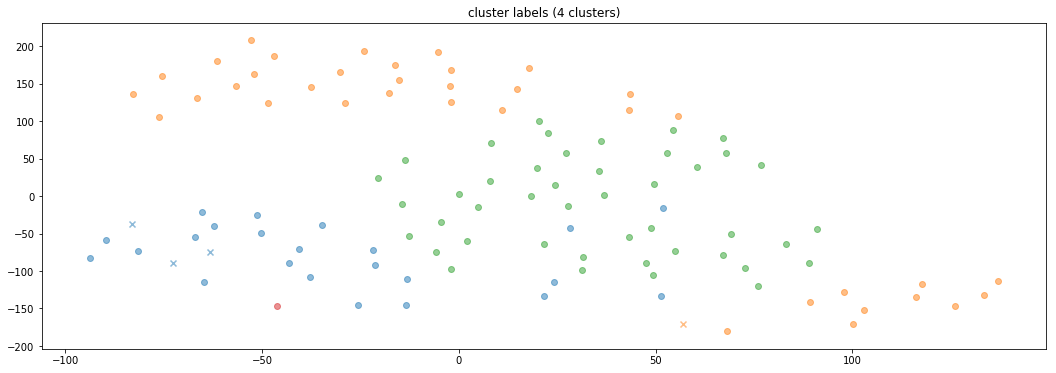

,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,...,s_class,s_simbad,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,tev_glon,tev_glat,marked,KMeans_clusters_4
11,0.014499,0.216198,0.331077,0.099187,0.322293,0.0,0.010681,0.002273,0.002087,0.000712,...,['B0Ve'],1,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',135.675278,1.086135,1,0
40,0.006512,0.225784,0.309710,0.088960,0.355733,0.0,0.003307,0.002040,0.001594,0.002120,...,['B0Ve'],2,b'1FGL J1018.6-5856 ',b'HMB ',b'1FGL J1018.6-5856',b'bin',284.314087,-1.779517,1,0
88,0.007598,0.117064,0.309349,0.034505,0.203540,0.0,0.118844,0.094852,0.067791,0.035185,...,['B0Ve'],1,b'1FGL J1826.2-1450 ',b'HMB ',b'',b'bin',16.881586,-1.289216,1,1
101,0.022409,0.362261,0.111730,0.253947,0.249653,0.0,0.000000,0.000000,0.000000,0.000000,...,['B0Ve'],1,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',80.299477,1.111117,1,0


0 cluster (tab:blue)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
6,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',[],[],0,0
11,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',"[""b'LS I +61 303'"" ""b'LS I +61 303'""]",['B0Ve'],1,1
13,b' ',b'rdg ',b'',b'hbl',[],[],0,0
19,b'1FGL J0507.9+6738 ',b'bll ',b'',b'hbl',[],[],0,0
22,b' ',b'PWN ',b'',b'psr',[],[],0,0
23,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'psr',[],[],0,0
26,b' ',b'bll ',b'',b'hbl',[],[],0,0
27,b'1FGL J0633.9+1746 ',b'PSR ',b'',"b'psr,pwn'",[],[],0,0
34,b'1FGL J0847.2+1134 ',b'bll ',"b'1FGL J0847.2+113,2FGL J0847.2+1134,3FGL J084...",b'hbl',[],[],0,0
36,b'1FGL J1000.1+6539 ',b'bll ',b'',b'blazar',[],[],0,0


1 cluster (tab:orange)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1,b' ',b'snr ',b'',b'snr',[],[],0,0
5,b' ',b'bll ',b'',b'hbl',[],[],0,0
10,b' ',b'bll ',b'',b'hbl',[],[],0,0
16,b' ',b'bll ',b'',b'hbl',[],[],0,0
20,b'1FGL J0521.7+2114 ',b'bll ',b'',b'ibl',[],[],0,0
21,b' ',b' ',b'',"b'snr,mc'",[],[],0,0
24,b' ',b'PWN ',b'',b'pwn',[],[],0,0
30,b'1FGL J0710.6+5911 ',b'bll ',b'1FGL J0710.6+5911',b'hbl',[],[],0,0
33,b' ',b'PWN ',b'',b'pwn',[],[],0,0
37,b' ',b'bll ',b'',b'hbl',[],[],0,0


2 cluster (tab:green)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
0,b' ',b'bll ',b'',b'hbl',[],[],0,0
2,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',[],[],0,0
3,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',[],[],0,0
4,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',[],[],0,0
7,b'1FGL J0221.0+3555 ',b'FSRQ ',b'',b'blazar',[],[],0,0
8,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',[],[],0,0
9,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'unid',[],[],0,0
12,b'1FGL J0303.5-2406 ',b'BLL ',b'',b'hbl',[],[],0,0
14,b'1FGL J0319.7+4130 ',b'RDG ',b'',b'fri',[],[],0,0
15,b'1FGL J0319.7+1847 ',b'bll ',b'',b'hbl',[],[],0,0


3 cluster (tab:red)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
65,b'1FGL J1512.8-0906 ',b'FSRQ ',b'',b'fsrq',[],[],0,0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.107887,0.239142,0.230554,0.163358,0.249526,0.0,0.003153,0.002291,0.001597,0.001403,0.001090
1,0.142897,0.096535,0.106939,0.101516,0.094745,0.0,0.161416,0.079385,0.058419,0.055827,0.102321
2,0.154746,0.191271,0.189231,0.180177,0.189818,0.0,0.068442,0.014268,0.006515,0.003885,0.001647
3,0.000057,0.000393,0.000838,0.000202,0.000636,0.0,0.000009,0.000187,0.002927,0.059691,0.935061


In [25]:
spectra_2D  = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)
list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 4, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

[0.2, 0.17, 0.14, 0.11, 0.08, 0.05, 0.02]


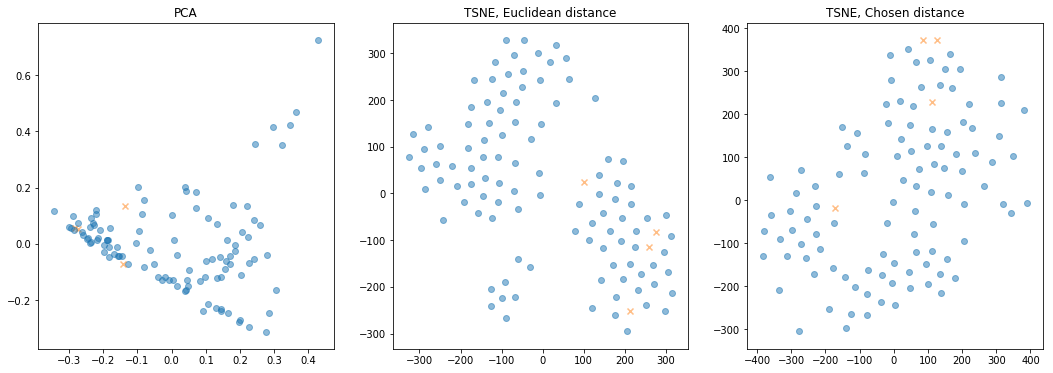

Clustering


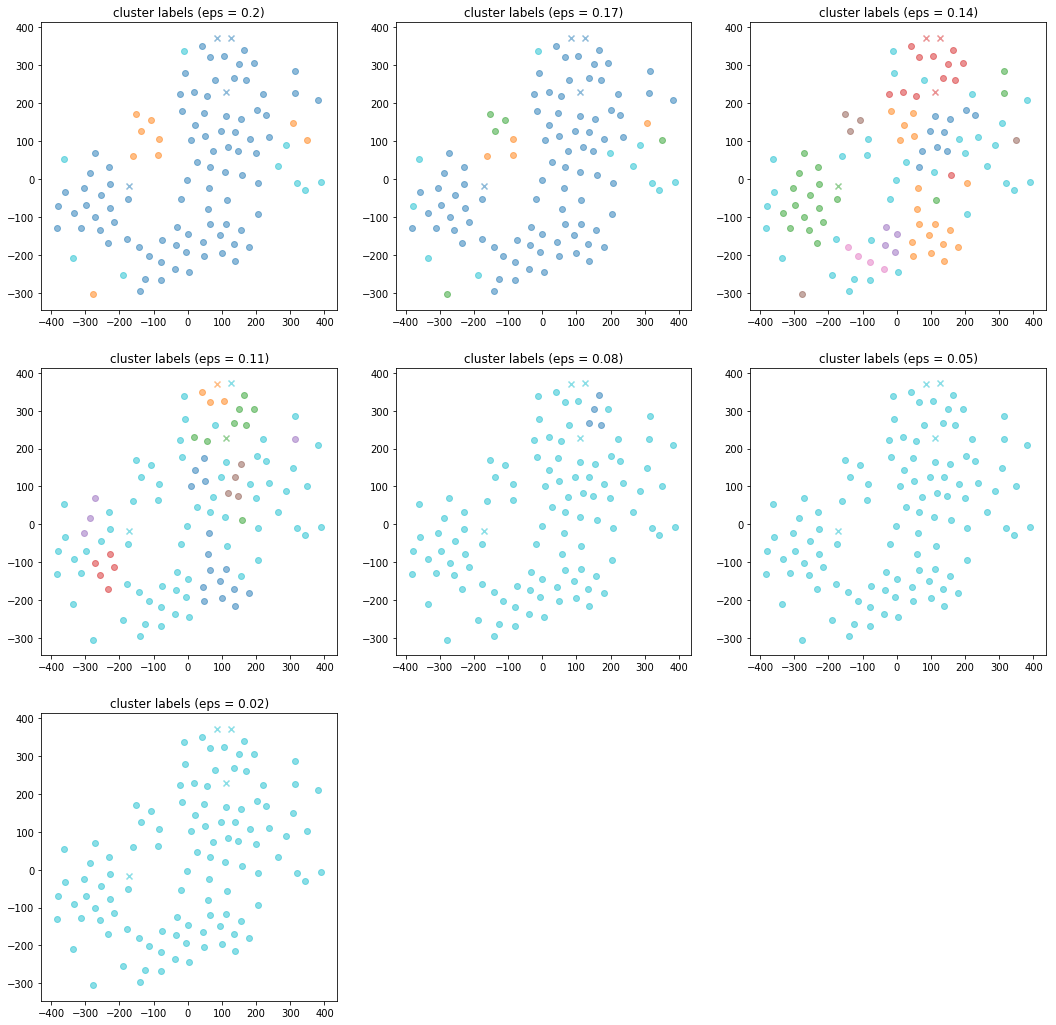

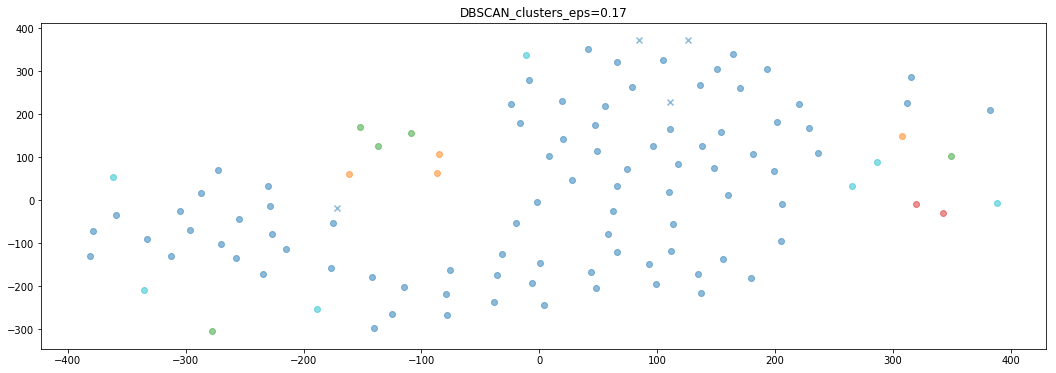

,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,...,s_class,s_simbad,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,tev_glon,tev_glat,marked,DBSCAN_clusters_eps=0.17
11,0.014499,0.216198,0.331077,0.099187,0.322293,0.0,0.010681,0.002273,0.002087,0.000712,...,['B0Ve'],1,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',135.675278,1.086135,1,0
40,0.006512,0.225784,0.309710,0.088960,0.355733,0.0,0.003307,0.002040,0.001594,0.002120,...,['B0Ve'],2,b'1FGL J1018.6-5856 ',b'HMB ',b'1FGL J1018.6-5856',b'bin',284.314087,-1.779517,1,0
88,0.007598,0.117064,0.309349,0.034505,0.203540,0.0,0.118844,0.094852,0.067791,0.035185,...,['B0Ve'],1,b'1FGL J1826.2-1450 ',b'HMB ',b'',b'bin',16.881586,-1.289216,1,0
101,0.022409,0.362261,0.111730,0.253947,0.249653,0.0,0.000000,0.000000,0.000000,0.000000,...,['B0Ve'],1,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',80.299477,1.111117,1,0


0 cluster (tab:blue)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
0,b' ',b'bll ',b'',b'hbl',[],[],0,0
2,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',[],[],0,0
3,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',[],[],0,0
4,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',[],[],0,0
5,b' ',b'bll ',b'',b'hbl',[],[],0,0
6,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',[],[],0,0
7,b'1FGL J0221.0+3555 ',b'FSRQ ',b'',b'blazar',[],[],0,0
8,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',[],[],0,0
9,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'unid',[],[],0,0
11,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',"[""b'LS I +61 303'"" ""b'LS I +61 303'""]",['B0Ve'],1,1


1 cluster (tab:orange)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
1,b' ',b'snr ',b'',b'snr',[],[],0,0
49,b'1FGL J1221.5+2814 ',b'bll ',b'',b'ibl',[],[],0,0
57,b' ',b'PSR ',b'',b'pwn',[],[],0,0
66,b'1FGL J1513.2-5904 ',b'PSR ',b'',b'pwn',[],[],0,0


2 cluster (tab:green)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
16,b' ',b'bll ',b'',b'hbl',[],[],0,0
21,b' ',b' ',b'',"b'snr,mc'",[],[],0,0
38,b'1FGL J1015.1+4927 ',b'bll ',b'',b'hbl',[],[],0,0
42,b'1FGL J1103.7-2329 ',b'bll ',b'',b'hbl',[],[],0,0
69,b'1FGL J1555.7+1111 ',b'BLL ',b'',b'hbl',[],[],0,0


3 cluster (tab:red)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
19,b'1FGL J0507.9+6738 ',b'bll ',b'',b'hbl',[],[],0,0
56,b'1FGL J1325.6-4300 ',b'RDG ',b'',b'fri',[],[],0,0


4 cluster (tab:purple)


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,s_MAIN_ID,s_class,s_simbad,marked
10,b' ',b'bll ',b'',b'hbl',[],[],0,0
13,b' ',b'rdg ',b'',b'hbl',[],[],0,0
63,b'1FGL J1443.8+2457 ',b'fsrq ',b'3FGL J1443.9+2502',b'fsrq',[],[],0,0
65,b'1FGL J1512.8-0906 ',b'FSRQ ',b'',b'fsrq',[],[],0,0
72,b'1FGL J1640.8-4634c',b'spp ',b'',b'pwn',[],[],0,0
73,b' ',b'spp ',b'',b'unid',[],[],0,0
83,b' ',b' ',b'',b'unid',"[""b'SSTGC 519103'"" ""b'SSTGC 519103'"" ""b'GCIRS ...",['Be' 'B' 'B' 'O'],1,0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.141942,0.180109,0.178987,0.158483,0.180328,0.0,0.076394,0.032617,0.021553,0.016178,0.013409
1,0.033666,0.061612,0.184107,0.041286,0.114943,0.0,0.314045,0.061764,0.030888,0.035056,0.122632
2,0.169085,0.051186,0.011159,0.065171,0.039534,0.0,0.059296,0.024707,0.034945,0.113516,0.431401
3,0.301620,0.098718,0.307294,0.128982,0.163386,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.077703,0.173231,0.098634,0.123147,0.149510,0.0,0.103249,0.052201,0.041639,0.029790,0.150896


In [26]:
eps_l = [0.01 * i for i in range(20, 0, -3)]
print(eps_l)
spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, eps_l=eps_l, TSNE_learning_rate=1000, TSNE_n_iter=1500, TSNE_learning_rate2=900)
list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.17, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)